In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np

In [2]:
closed_df = pd.read_csv('olist_closed_deals_dataset.csv')
qualified_df = pd.read_csv('olist_marketing_qualified_leads_dataset.csv')

In [3]:
mql_merged = pd.merge(qualified_df, closed_df, on =['mql_id'])

In [125]:
mql_merged.to_csv('qualified_closed_df.csv')

In [4]:
'''Question 1. 
        
        How long does it take for a lead to move from first contact to deal won on average(by origin)?'''

'Question 1. \n        \n        How long does it take for a lead to move from first contact to deal won on average(by origin)?'

In [5]:
avg_close = pd.merge(closed_df, qualified_df, on =['mql_id'], how = 'left') #merging both dfs to see bigger picture

In [6]:
avg_close = avg_close[['mql_id','origin','first_contact_date','won_date']] #selecting all necessary columsns for answering first question

In [7]:
avg_close['first_contact_date'] = pd.to_datetime(avg_close['first_contact_date']) #changing column type to datetime

In [8]:
avg_close['won_date'] = pd.to_datetime(avg_close['won_date']) #changing column type to datetime

In [9]:
avg_close['days_to_close']= avg_close['won_date'].dt.date - avg_close['first_contact_date'].dt.date  #getting the whole

In [10]:
avg_close['days_to_close'] = avg_close['days_to_close'] / pd.Timedelta(days=1) 
#removing hours and seconds from the code

In [11]:
avg_close['origin'].fillna('unknown', inplace=True) #add null values into unknown category

/var/folders/23/0f9fvs_d7pz0f05wkdmmy5p80000gn/T/ipykernel_11070/2245420448.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  avg_close['origin'].fillna('unknown', inplace=True) #add null values into unknown category


In [12]:
avg_close['origin'].replace('other','unknown', inplace = True) #add other values into unknown category

In [13]:
closed_deals_by_origin = avg_close.groupby(['origin'])['days_to_close'].count().sort_values(ascending = False).reset_index()
#create a df with amount of deals but origin

In [82]:
closed_deals_by_origin

,origin,closed_deals_by_origin
0,organic_search,271
1,unknown,197
2,paid_search,195
3,social,75
4,direct_traffic,56
5,referral,24
6,email,15
7,display,6
8,other_publicities,3


/var/folders/23/0f9fvs_d7pz0f05wkdmmy5p80000gn/T/ipykernel_11070/2527207472.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=days_to_close, x='origin', y='days_to_close', palette="coolwarm")


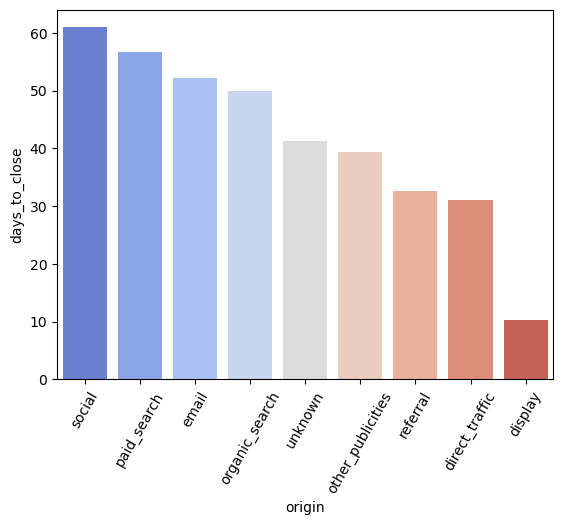

In [89]:
sns.barplot(data=days_to_close, x='origin', y='days_to_close', palette="coolwarm")
plt.xticks(rotation=60)
plt.show()

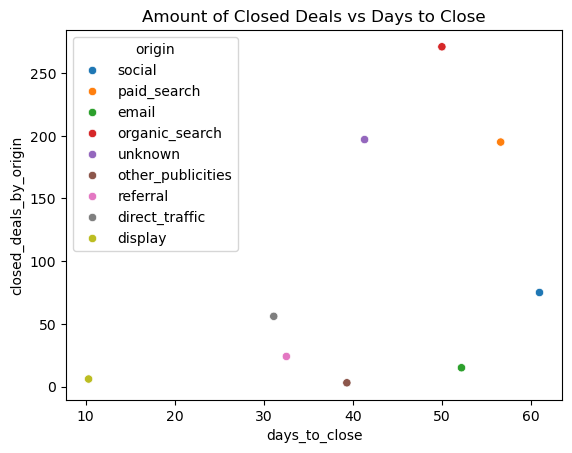

In [95]:
sns.scatterplot(x = "days_to_close", 
                y = "closed_deals_by_origin", 
                data = days_to_close,
                hue='origin',
                legend = True

               )
plt.title("Amount of Closed Deals vs Days to Close")
plt.show()

In [15]:
closed_deals_by_origin.rename(columns = {'days_to_close': 'closed_deals_by_origin'}, inplace = True)

In [16]:
general_avg_days_per_close = avg_close['days_to_close'].mean().round(2) #the average days for a close at the company

In [17]:
days_to_close_df = avg_close.groupby('origin')['days_to_close'].mean().sort_values(ascending = False).round(2).reset_index()
#group by of bigger df, into smaller 2 columns df to be able to merge with the closed deals by origin

In [18]:
days_to_close = pd.merge(days_to_close_df, closed_deals_by_origin, on =['origin'])
#merging of days_to_close_df with closed deals by origin to see how many deals, and what is the time it takes for each origin

In [19]:
days_to_close #FINAL ANSWER

,origin,days_to_close,closed_deals_by_origin
0,social,60.96,75
1,paid_search,56.60,195
2,email,52.20,15
3,organic_search,50.00,271
4,unknown,41.32,197
5,other_publicities,39.33,3
6,referral,32.54,24
7,direct_traffic,31.12,56
8,display,10.33,6


In [123]:
days_to_close.to_csv('lead_time_to_close_by_origin.csv')

In [20]:
'''Question 2 Analysis

        Which marketing origins produce the highest conversion rate to closed deals?'''

'Question 2 Analysis\n\n        Which marketing origins produce the highest conversion rate to closed deals?'

In [21]:
qualified_leads_origin = qualified_df.groupby('origin').size().sort_values(ascending = False).reset_index()
#find the amount of qualified leads by origin by doing size and grouping by origin

In [22]:
qualified_leads_origin.rename(columns = {0:'qualified_leads_by_origin'}, inplace = True) 
#rename column from 0 to qualified_leads_by_origin

In [23]:
conversion_rates_percentages = pd.merge(closed_deals_by_origin, qualified_leads_origin, on = 'origin')

In [24]:
conversion_rates_percentages['conversion_rate_by_origin'] = (conversion_rates_percentages.iloc[:,1]/conversion_rates_percentages.iloc[:,2]).round(3)
#to find the percentage I had to find the column with iloc, and then divide it by the other column.
#I had to [: what that means is to select all rows, then after the comma you need to actually select which column by index

In [25]:
conversion_rates_percentages #FINAL ANSWER TO QUESTION

,origin,closed_deals_by_origin,qualified_leads_by_origin,conversion_rate_by_origin
0,organic_search,271,2296,0.118
1,unknown,197,1099,0.179
2,paid_search,195,1586,0.123
3,social,75,1350,0.056
4,direct_traffic,56,499,0.112
5,referral,24,284,0.085
6,email,15,493,0.030
7,display,6,118,0.051
8,other_publicities,3,65,0.046


In [122]:
conversion_rates_percentages.to_csv('conversion_rate_by_origin.csv')

In [26]:
'''Question 3 Analysis

       Is there a correlation between a sales rep's amount of closed deals and the diversity of business segments they handle?'''

"Question 3 Analysis\n\n       Is there a correlation between a sales rep's amount of closed deals and the diversity of business segments they handle?"

In [27]:
conversion_analysis_df = pd.merge(qualified_df, closed_df , on =['mql_id'], how = 'left')

In [28]:
sr_segment_matrix = pd.crosstab(mql_merged['sr_id'], mql_merged['business_segment']) 
#crosstab between sales representatives and business segment

In [29]:
sr_segment_matrix['closed_deals_by_sr']= sr_segment_matrix.sum(axis=1)
#do the addition on the rows to see the amount of sales done by each rep

In [30]:
sr_segment_matrix.sort_values(by = ['closed_deals_by_sr'], ascending = False).reset_index()
#sorting values to see who is the most profitable sales rep

business_segment,sr_id,air_conditioning,audio_video_electronics,baby,bags_backpacks,bed_bath_table,books,car_accessories,computers,construction_tools_house_garden,...,perfume,pet,phone_mobile,religious,small_appliances,sports_leisure,stationery,toys,watches,closed_deals_by_sr
0,4ef15afb4b2723d8f3d81e51ec7afefe,1,9,4,4,3,0,10,9,12,...,0,5,3,0,2,2,2,5,2,133
1,d3d1e91a157ea7f90548eef82f1955e3,0,7,1,2,3,1,5,6,9,...,0,4,1,0,2,2,0,2,1,82
2,6565aa9ce3178a5caf6171827af3a9ba,0,5,0,2,2,2,9,3,6,...,0,1,1,0,1,4,0,1,0,74
3,85fc447d336637ba1df43e793199fbc8,0,5,1,1,2,1,6,1,8,...,0,3,1,0,0,2,1,0,0,64
4,495d4e95a8cf8bbf8b432b612a2aa328,1,5,2,2,0,1,6,0,2,...,0,5,0,0,1,3,4,0,0,63
5,fbf4aef3f6915dc0c3c97d6812522f6a,0,6,0,1,0,0,3,2,7,...,0,3,0,1,1,2,2,1,0,59
6,2695de1affa7750089c0455f8ce27021,0,8,0,0,1,0,5,1,2,...,0,2,1,0,1,2,1,0,1,58
7,de63de0d10a6012430098db33c679b0b,0,2,0,3,2,0,11,1,1,...,0,0,2,0,0,2,0,2,1,53
8,9ae085775a198122c5586fa830ff7f2b,0,5,0,2,2,1,5,0,3,...,0,2,1,0,0,0,2,3,1,51
9,c638112b43f1d1b86dcabb0da720c901,0,4,0,1,2,1,4,2,0,...,0,2,1,0,3,1,0,0,1,36


In [31]:
closed_deals_count = sr_segment_matrix[['closed_deals_by_sr']]
#create a new data frame to separate the closed deals per sales rep

In [32]:
segment_count_df = sr_segment_matrix.applymap(lambda x: 1 if x>0 else x)
#make all values in columsn equal to one, so that I can then add these values and find the number of segments

/var/folders/23/0f9fvs_d7pz0f05wkdmmy5p80000gn/T/ipykernel_11070/609362801.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  segment_count_df = sr_segment_matrix.applymap(lambda x: 1 if x>0 else x)


In [33]:
segment_count_df['number_of_segments']= segment_count_df.sum(axis=1)
#add values form all the columsn to find number of segments per sales rep

In [34]:
number_of_segments = segment_count_df['number_of_segments'].reset_index()

In [35]:
segments_and_sales = pd.merge(closed_deals_count,number_of_segments, on = 'sr_id')

In [36]:
segments_and_sales.sort_values(by = 'number_of_segments', ascending = False)

,sr_id,closed_deals_by_sr,number_of_segments
7,4ef15afb4b2723d8f3d81e51ec7afefe,133,28
19,d3d1e91a157ea7f90548eef82f1955e3,82,27
9,6565aa9ce3178a5caf6171827af3a9ba,74,24
11,85fc447d336637ba1df43e793199fbc8,64,23
3,2695de1affa7750089c0455f8ce27021,58,21
5,495d4e95a8cf8bbf8b432b612a2aa328,63,21
18,c638112b43f1d1b86dcabb0da720c901,36,19
21,fbf4aef3f6915dc0c3c97d6812522f6a,59,19
13,9ae085775a198122c5586fa830ff7f2b,51,18
16,a8387c01a09e99ce014107505b92388c,26,17


In [121]:
segments_and_sales.to_csv('rep_closed_deals_vs_segment_diversity.csv')

In [98]:
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

In [100]:
correlation_matrix_seg_closed = pd.crosstab(segments_and_sales['closed_deals_by_sr'], segments_and_sales['number_of_segments'])

In [101]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(correlation_matrix_seg_closed)
chi2_statistic, chi2_p_value

(np.float64(286.0), np.float64(0.06934938740954429))

In [ ]:
#p-value is 0.069 which means there is not enough evidence to say that 
# there is a correlation between closed_deals_by_sr and number of segments

In [106]:
spearman_correlation_segments_sales = segments_and_sales['closed_deals_by_sr'].corr(segments_and_sales['number_of_segments'], method='spearman')

In [107]:
spearman_correlation_segments_sales 
#This proves that there is a very strong correlation between closed deals by sales rep and number of segments handled

np.float64(0.9795816791560391)

In [37]:
'''Question 4 Analysis

            Do certain lead behaviour profiles (cat, wolf, eagle, etc.) lead to quicker closes and higher win rate?'''

'Question 4 Analysis\n\n            Do certain lead behaviour profiles (cat, wolf, eagle, etc.) lead to quicker closes and higher win rate?'

In [38]:
mql_merged['lead_behaviour_profile'].unique()

array(['cat', 'eagle', nan, 'wolf', 'shark', 'cat, wolf', 'eagle, wolf',
       'shark, cat', 'eagle, cat', 'shark, wolf'], dtype=object)

In [39]:
profile_analysis = mql_merged[['mql_id','lead_behaviour_profile','first_contact_date','won_date']]

In [40]:
profile_analysis['first_contact_date'] = pd.to_datetime(profile_analysis['first_contact_date']) #changing column type to datetime

/var/folders/23/0f9fvs_d7pz0f05wkdmmy5p80000gn/T/ipykernel_11070/1539586128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_analysis['first_contact_date'] = pd.to_datetime(profile_analysis['first_contact_date']) #changing column type to datetime


In [41]:
profile_analysis['won_date'] = pd.to_datetime(profile_analysis['won_date']) #changing column type to datetime

/var/folders/23/0f9fvs_d7pz0f05wkdmmy5p80000gn/T/ipykernel_11070/1922243313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_analysis['won_date'] = pd.to_datetime(profile_analysis['won_date']) #changing column type to datetime


In [42]:
profile_analysis['days_to_close']= profile_analysis['won_date'].dt.date - profile_analysis['first_contact_date'].dt.date  
#getting the time that gets to close based on each profile

/var/folders/23/0f9fvs_d7pz0f05wkdmmy5p80000gn/T/ipykernel_11070/1047600322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_analysis['days_to_close']= profile_analysis['won_date'].dt.date - profile_analysis['first_contact_date'].dt.date


In [43]:
profile_analysis['days_to_close'] = profile_analysis['days_to_close'] / pd.Timedelta(days=1) 
#removing hours and seconds from the code

/var/folders/23/0f9fvs_d7pz0f05wkdmmy5p80000gn/T/ipykernel_11070/1186126291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profile_analysis['days_to_close'] = profile_analysis['days_to_close'] / pd.Timedelta(days=1)


In [44]:
profile_analysis = profile_analysis[['lead_behaviour_profile','days_to_close']]

In [45]:
profile_analysis.sort_values(by = 'lead_behaviour_profile')

,lead_behaviour_profile,days_to_close
0,cat,5.0
386,cat,8.0
382,cat,207.0
381,cat,6.0
380,cat,0.0
...,...,...
824,NaN,20.0
829,NaN,14.0
830,NaN,4.0
832,NaN,70.0


In [46]:
leads_by_profile = profile_analysis.groupby('lead_behaviour_profile')['days_to_close'].count().sort_values(ascending = False).round(2).reset_index()

In [47]:
leads_by_profile = leads_by_profile.rename(columns = {'days_to_close':'lead_count_by_profile'})

In [48]:
days_to_close_by_profile = profile_analysis.groupby('lead_behaviour_profile')['days_to_close'].mean().sort_values(ascending = False).round(2).reset_index()

In [49]:
days_to_close_by_profile = days_to_close_by_profile.rename(columns = {'days_to_close':'days_to_close_by_profile'})

In [64]:
days_to_close_by_profile = pd.merge(leads_by_profile, days_to_close_by_profile, on = 'lead_behaviour_profile').head(4)

In [66]:
days_to_close_by_profile.describe()

,lead_count_by_profile,days_to_close_by_profile
count,4.000000,4.000000
mean,162.250000,58.995000
std,168.403038,24.180716
min,24.000000,35.980000
25%,77.250000,39.520000
50%,109.000000,58.040000
75%,194.000000,77.515000
max,407.000000,83.920000


In [124]:
days_to_close_by_profile.to_csv('time_to_close_by_behavior_profile.csv')

/var/folders/23/0f9fvs_d7pz0f05wkdmmy5p80000gn/T/ipykernel_11070/4276070331.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=days_to_close_by_profile, x='lead_behaviour_profile', y='days_to_close_by_profile', palette="coolwarm")


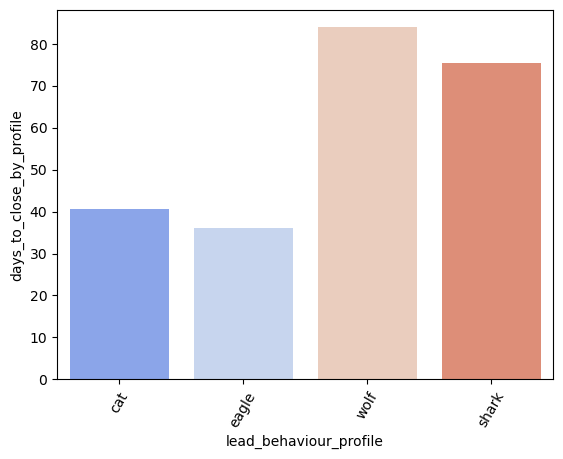

In [110]:
sns.barplot(data=days_to_close_by_profile, x='lead_behaviour_profile', y='days_to_close_by_profile', palette="coolwarm")
plt.xticks(rotation=60)
plt.show()